In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from scipy import stats

In [ ]:
# Load the csv file into the dataframe
df = pd.read_csv("/MaterialsProject_Perovskite_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Columns: 105 entries, nsites to element_3_density
dtypes: bool(3), float64(82), int64(10), object(10)
memory usage: 3.6+ MB


In [ ]:
df = df.drop(columns=['element_1_avg_ionic_radius', 'element_2_avg_ionic_radius', 'element_3_avg_ionic_radius'])

In [ ]:
df = df.drop(columns=['chemsys'])

In [ ]:
df = df.drop(columns=['element_1_ionic_radius', 'element_2_ionic_radius', 'element_3_ionic_radius'])

In [ ]:
df = df.drop(columns=['element_1','element_2','element_3'])

In [ ]:
df = df.drop(columns = ['is_metal'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 94 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   nsites                                             4555 non-null   int64  
 1   volume                                             4555 non-null   float64
 2   density                                            4555 non-null   float64
 3   density_atomic                                     4555 non-null   float64
 4   energy_per_atom                                    4555 non-null   float64
 5   formation_energy_per_atom                          4555 non-null   float64
 6   is_stable                                          4555 non-null   bool   
 7   band_gap                                           4555 non-null   float64
 8   cbm                                                2356 non-null   float64
 9   vbm     

In [ ]:
print(df.columns)


Index(['nsites', 'volume', 'density', 'density_atomic', 'energy_per_atom',
       'formation_energy_per_atom', 'is_stable', 'band_gap', 'cbm', 'vbm',
       'efermi', 'is_gap_direct', 'is_magnetic', 'ordering',
       'total_magnetization', 'total_magnetization_normalized_vol',
       'total_magnetization_normalized_formula_units', 'energy_above_hull',
       'crystal_system', 'a', 'b', 'c', 'alpha', 'beta', 'gamma',
       'atomic_num1', 'atomic_num2', 'atomic_num3', 'element_1_group_number',
       'element_1_row_number', 'element_1_electronegativity',
       'element_1_atomic_radius', 'element_2_group_number',
       'element_2_row_number', 'element_2_electronegativity',
       'element_2_atomic_radius', 'element_3_group_number',
       'element_3_row_number', 'element_3_electronegativity',
       'element_3_atomic_radius', 'element_1_atomic_radius_calculated',
       'element_1_van_der_waals_radius', 'element_1_mendeleev_no',
       'element_1_molar_volume', 'element_1_electron_aff

In [ ]:
#Removing all the band gap rows that are 0
df = df[df['band_gap'] > 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 4541
Data columns (total 94 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   nsites                                             2222 non-null   int64  
 1   volume                                             2222 non-null   float64
 2   density                                            2222 non-null   float64
 3   density_atomic                                     2222 non-null   float64
 4   energy_per_atom                                    2222 non-null   float64
 5   formation_energy_per_atom                          2222 non-null   float64
 6   is_stable                                          2222 non-null   bool   
 7   band_gap                                           2222 non-null   float64
 8   cbm                                                2222 non-null   float64
 9   vbm          

In [ ]:
#We only need numerical values for training our first batch
df_numeric = df.select_dtypes(include=['number'])

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 4541
Data columns (total 89 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   nsites                                             2222 non-null   int64  
 1   volume                                             2222 non-null   float64
 2   density                                            2222 non-null   float64
 3   density_atomic                                     2222 non-null   float64
 4   energy_per_atom                                    2222 non-null   float64
 5   formation_energy_per_atom                          2222 non-null   float64
 6   band_gap                                           2222 non-null   float64
 7   cbm                                                2222 non-null   float64
 8   vbm                                                2222 non-null   float64
 9   efermi       

In [ ]:
#Removing columns with NaN values
df_cleaned = df.dropna(axis=1)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 4541
Data columns (total 70 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   nsites                             2222 non-null   int64  
 1   volume                             2222 non-null   float64
 2   density                            2222 non-null   float64
 3   density_atomic                     2222 non-null   float64
 4   energy_per_atom                    2222 non-null   float64
 5   formation_energy_per_atom          2222 non-null   float64
 6   is_stable                          2222 non-null   bool   
 7   band_gap                           2222 non-null   float64
 8   cbm                                2222 non-null   float64
 9   vbm                                2222 non-null   float64
 10  efermi                             2222 non-null   float64
 11  is_gap_direct                      2222 non-null   bool   
 1

In [ ]:
df_cleaned = df_cleaned.drop(columns=['cbm' , 'vbm'])

In [ ]:
#We do not require the crystal structure as of now, we may in the future though
df_cleaned = df_cleaned.drop(columns = ['crystal_system'])

KeyError: "['crystal_system'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Here we are p
X = df_cleaned.drop(columns=['band_gap'])
y = df_cleaned['band_gap']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


GBR

In [ ]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.14, max_depth=5, random_state=42, max_leaf_nodes= 16)


In [ ]:
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:\nMAE: {mae:.4f}\nMSE: {mse:.4f}\nR2 Score: {r2:.4f}")


Model Evaluation Metrics:
MAE: 0.4763
MSE: 0.4541
R2 Score: 0.8022


In [ ]:
print("Variance of y_test:", y_test.var())


Variance of y_test: 2.3003944580789573


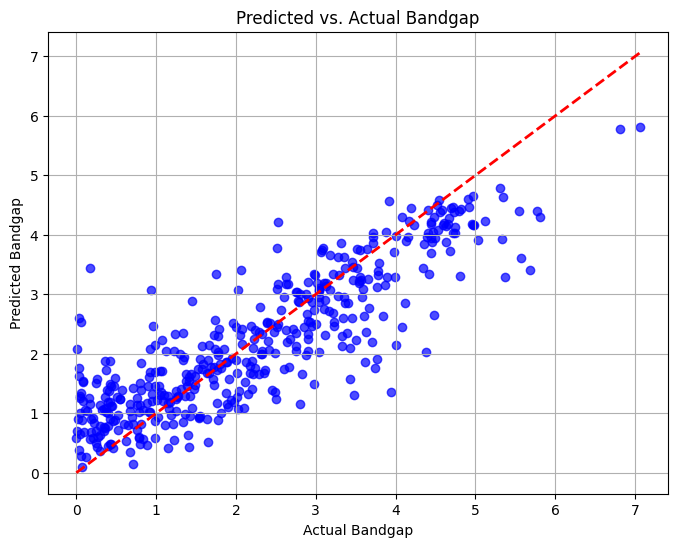

In [ ]:
import matplotlib.pyplot as plt

# Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Predicted vs. Actual Bandgap')
plt.grid()
plt.show()


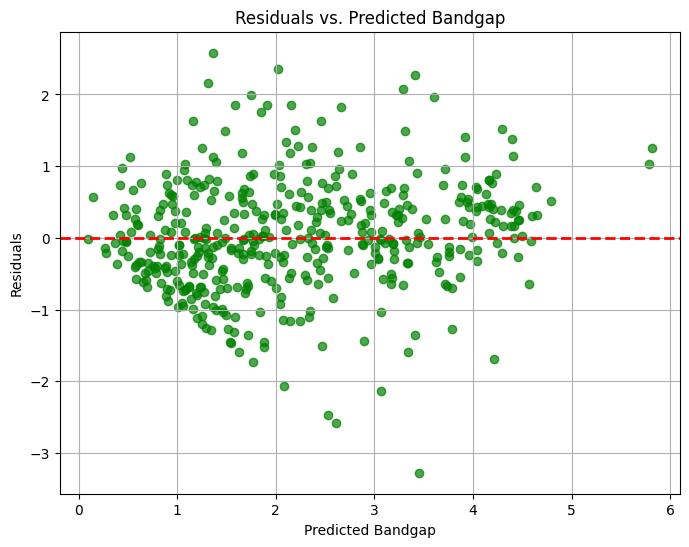

In [ ]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Bandgap')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Bandgap')
plt.grid()
plt.show()


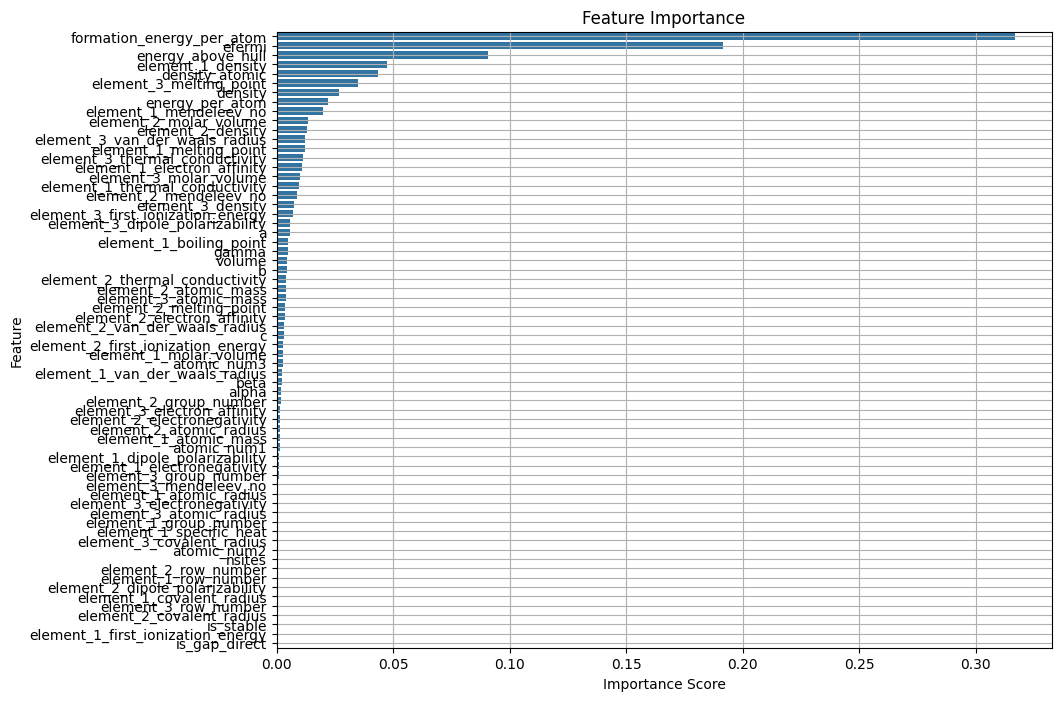

In [ ]:
import numpy as np
import seaborn as sns

# Feature importance
feature_importances = gbr_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid()
plt.show()


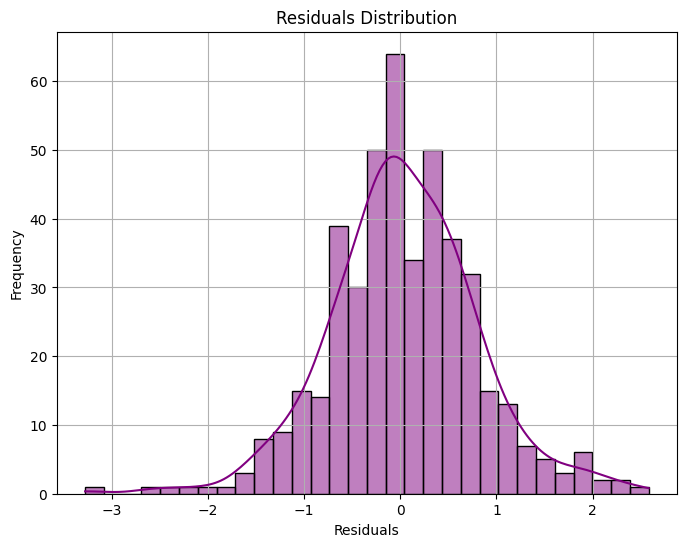

In [ ]:
import seaborn as sns

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


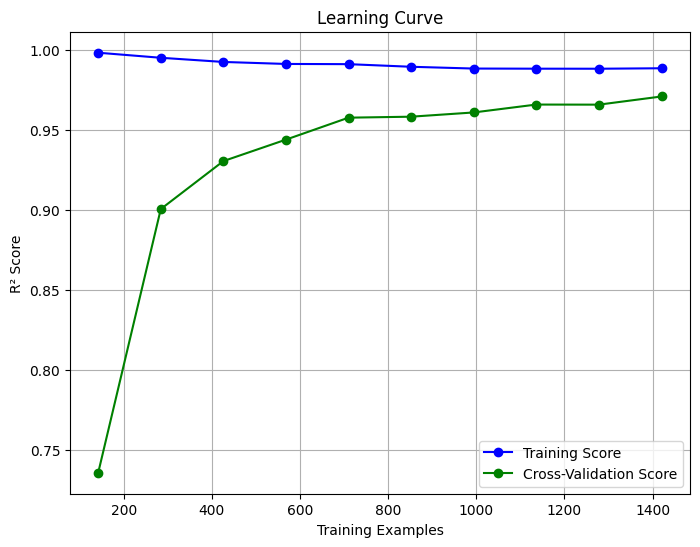

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    gbr_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid()
plt.show()


Random Forrest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Train the model
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.5010
MSE: 0.5097
R² Score: 0.7779


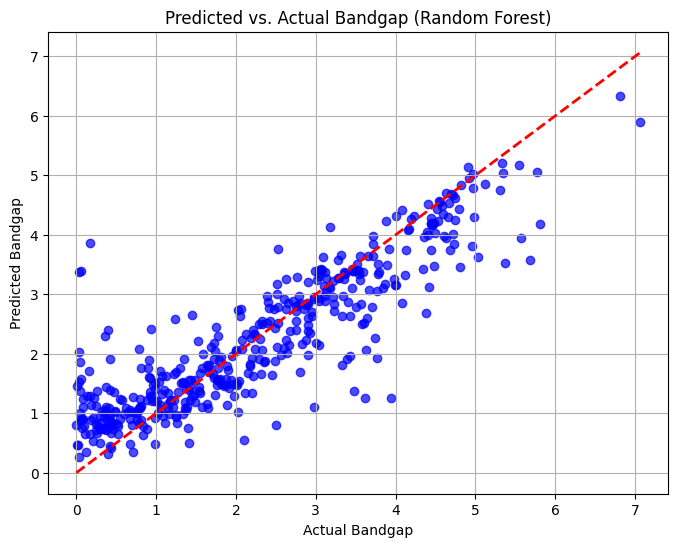

In [ ]:
# Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Predicted vs. Actual Bandgap (Random Forest)')
plt.grid()
plt.show()


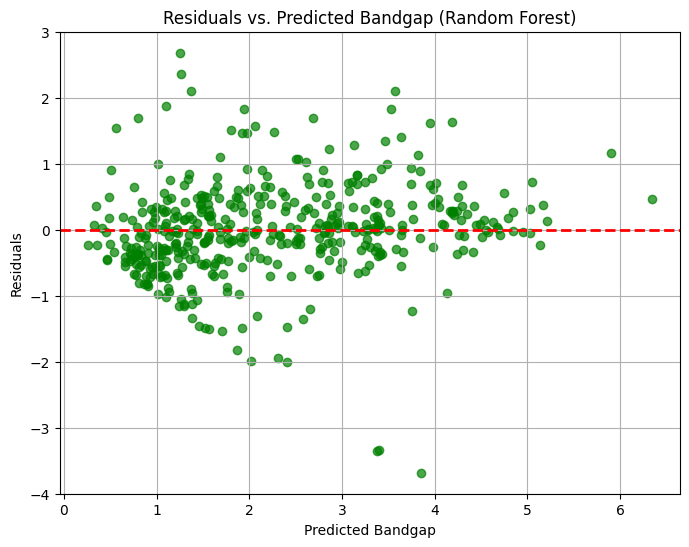

In [ ]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Bandgap')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Bandgap (Random Forest)')
plt.grid()
plt.show()


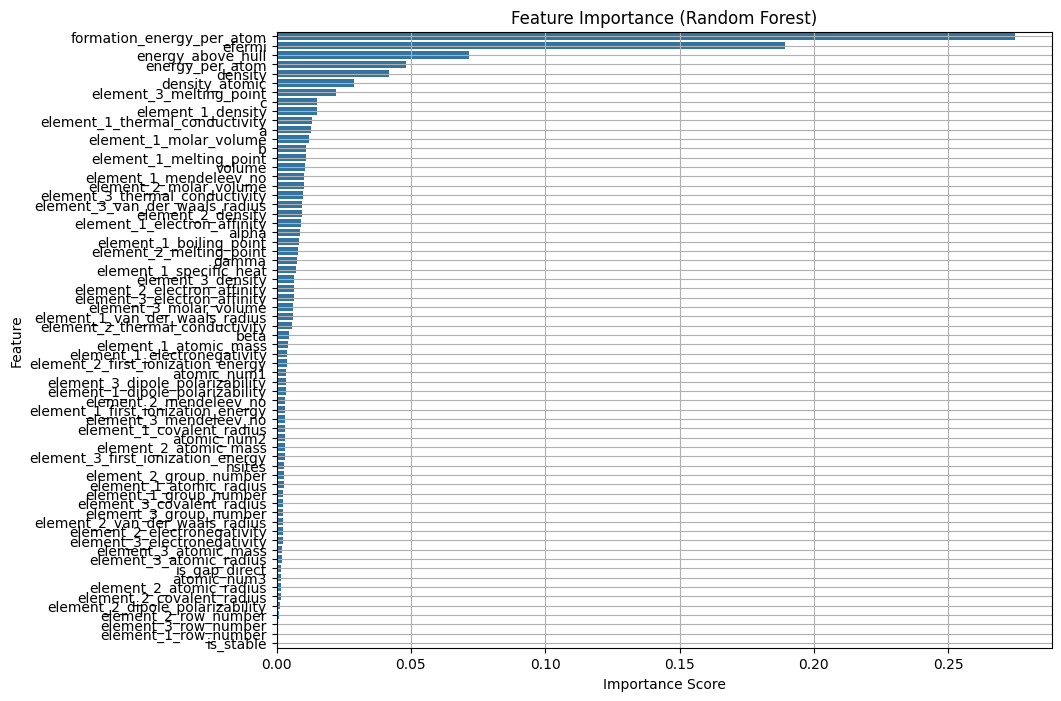

In [ ]:
# Feature importance
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]  # Sort in descending order

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid()
plt.show()


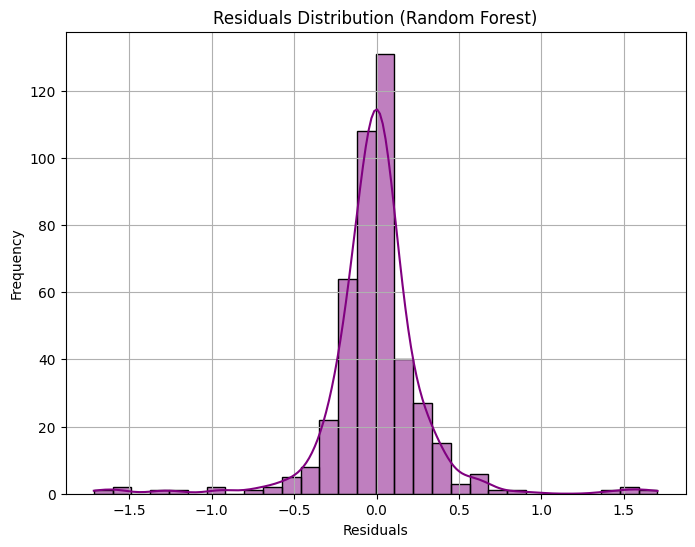

In [ ]:
# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


Multi Layer Perceptron

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(66, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer (no activation for regression)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6453 - mae: 1.7079 - val_loss: 1.6701 - val_mae: 1.0548
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3712 - mae: 0.9489 - val_loss: 1.2642 - val_mae: 0.9105
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0118 - mae: 0.7926 - val_loss: 1.0599 - val_mae: 0.8187
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7871 - mae: 0.7007 - val_loss: 0.9738 - val_mae: 0.7627
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6831 - mae: 0.6481 - val_loss: 0.8855 - val_mae: 0.7202
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6445 - mae: 0.6208 - val_loss: 0.8202 - val_mae: 0.6691
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5643 - mae: 0.5759 - val_loss: 0.8711 - val_mae: 0.6970
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5091 - mae: 0.5427 - val_loss: 0.8221 - val_mae: 0.6653
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.445

In [ ]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE: 0.5575
MSE: 0.5801
R² Score: 0.7473


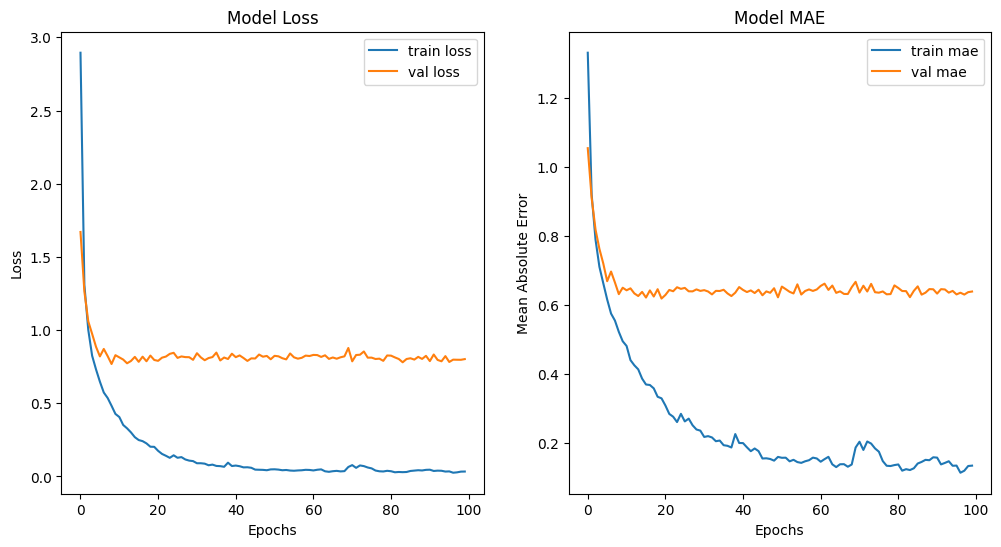

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

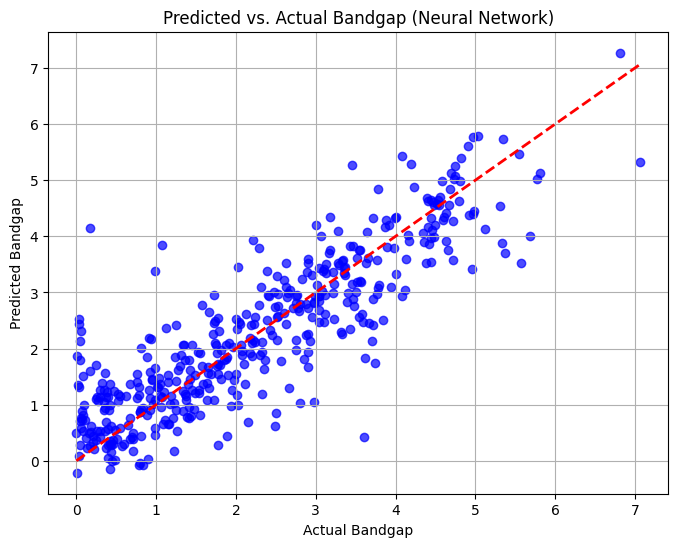

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Predicted vs. Actual Bandgap (Neural Network)')
plt.grid()
plt.show()

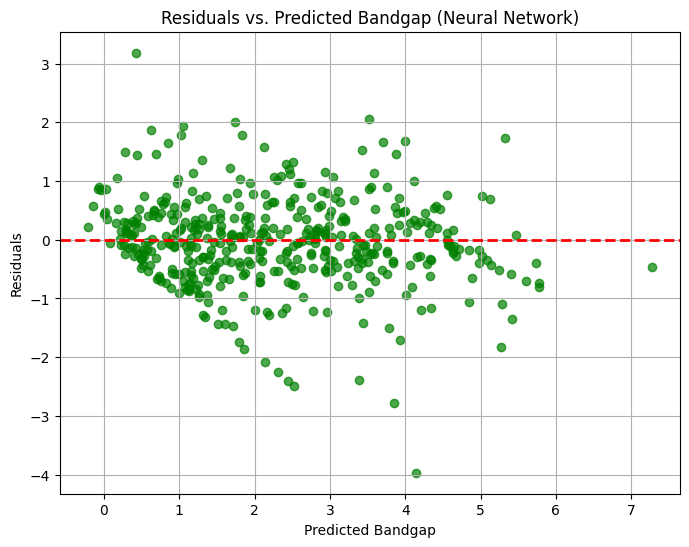

In [ ]:
# Reshape y_pred to 1D if it's 2D
y_pred = y_pred.flatten()  # Flatten the predictions to make it 1D

# Now calculate the residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Bandgap')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Bandgap (Neural Network)')
plt.grid()
plt.show()

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 4541
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   nsites                             2222 non-null   int64  
 1   volume                             2222 non-null   float64
 2   density                            2222 non-null   float64
 3   density_atomic                     2222 non-null   float64
 4   energy_per_atom                    2222 non-null   float64
 5   formation_energy_per_atom          2222 non-null   float64
 6   is_stable                          2222 non-null   bool   
 7   band_gap                           2222 non-null   float64
 8   efermi                             2222 non-null   float64
 9   is_gap_direct                      2222 non-null   bool   
 10  energy_above_hull                  2222 non-null   float64
 11  a                                  2222 non-null   float64
 1